In [173]:
import numpy as np
import math

# Numpy

### 8. Замена nan на среднее значение.

Реализуйте функцию, которая во входной вещественной матрице X находит все значения nan и заменяет их на среднее арифметическое всех остальных элементов. Если все элементы матрицы nan, то верните нулевую матрицу той же размерности.

Например, матрица `np.array([[nan, 1, 2, 3], [4, nan, 5, nan]])` перейдет в `np.array([[3, 1, 2, 3], [4, 3, 5, 3]])`

Подсказка: используйте функцию `np.isnan()` и функцию `np.mean()`

In [188]:
def check_nan(matrix):
    if np.all(np.isnan(matrix)):
        return np.full(matrix.shape, 0)
    
    if True in np.isnan(matrix):
        return np.where(np.isnan(matrix), round(np.mean(matrix[~np.isnan(matrix)])), matrix)

- matrix.size - размер матрицы
- np.count_nonzero() - количество вхождений элемента в массив/матрицу
- np.full((x, y), element) - создает массив/матрицу заданной размерности и элемента
- np.nan_to_num - замечняет все nan в массиве/матрице на 0
- np.mean - среднее значение элемнтов массива/матрицы
- np.isnan() - поиск nan в массиве/матрице
- np.where(условие, элемент выплненого условия, элемент невыполненного условия)

In [189]:
a = np.random.randint(-10, 10, 25).reshape(5, 5)
with_nan = np.where(a < 0, np.nan, a)
with_nan

array([[nan,  0., nan,  1., nan],
       [ 5.,  7., nan,  1.,  1.],
       [nan,  6.,  5., nan,  8.],
       [ 4., nan, nan,  0.,  2.],
       [nan,  1.,  5., nan, nan]])

In [190]:
check_nan(with_nan)

array([[3., 0., 3., 1., 3.],
       [5., 7., 3., 1., 1.],
       [3., 6., 5., 3., 8.],
       [4., 3., 3., 0., 2.],
       [3., 1., 5., 3., 3.]])

In [191]:
all_nan = np.full((2, 6), np.nan)
all_nan

array([[nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan]])

In [192]:
check_nan(all_nan)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

---

### 9. Равенство массивов.
Реализуйте функцию, которая на вход принимает два массива first_array и second_array (массивы могут быть n-мерные, разной размерности), а возвращает True если они равны и False - иначе.

In [296]:
def сompare_arrays(first_array, second_array):
    if first_array.shape == second_array.shape:
        return np.all(np.isclose(first_array, second_array)) 
    return False

In [297]:
a = np.arange(25).reshape(5, 5)

b = np.arange(25).reshape(5, 5)
c = np.random.randint(10, 20, 25).reshape(5, 5)
d = np.arange(9).reshape(3, 3)
e = np.random.randint(10, 20, 9)

In [298]:
сompare_arrays(a, b), сompare_arrays(a, c), сompare_arrays(a, d), сompare_arrays(a, e)

(True, False, False, False)

---

### 10. Stacking нескольких массивов в один массив (разные размерности)
Реализуйте совмещение нескольких 2-мерных массивов в один 3-мерный с помощью cropping-a, то есть вырезания из всех массивов наименьшей размерности.

In [327]:
shapes = np.arange(5, 11)
list_of_arrays = [np.random.random((np.random.choice(shapes), np.random.choice(shapes))) for x in range(5)]

In [328]:
[x.shape for x in list_of_arrays]

[(5, 8), (10, 6), (5, 5), (10, 5), (9, 8)]

In [329]:
min_shapes = min([x.shape[0] for x in list_of_arrays]), min([x.shape[1] for x in list_of_arrays])

In [330]:
cropped = [x[:min_shapes[0], :min_shapes[1]] for x in list_of_arrays]

In [331]:
[x.shape for x in cropped]

[(5, 5), (5, 5), (5, 5), (5, 5), (5, 5)]

In [332]:
result = np.stack(cropped)
result.shape

(5, 5, 5)

---

# Pandas

In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Объединение данных

In [587]:
energy_data = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv",
                          index_col=0, parse_dates=True)

In [588]:
energy_data

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [589]:
energy_data['Year'] = energy_data.index.year
energy_data['Month'] = energy_data.index.month
energy_data['Weekday Name'] = energy_data.index.weekday

In [592]:
data_columns = ['Consumption', 'Wind', 'Solar']

In [593]:
energy_data_mean = energy_data[data_columns].resample('W').mean()
energy_data_7d = energy_data[data_columns].rolling(7, center=True).mean()
energy_data_365d = energy_data[data_columns].rolling(window=365, center=True, min_periods=360).mean()

### Задание.
1. Выше мы строили график прозводства солнечной энергии по дням за полгода 17 года. Постройте график за больший период. Всегда ли растет график? с чем это может быть связано?

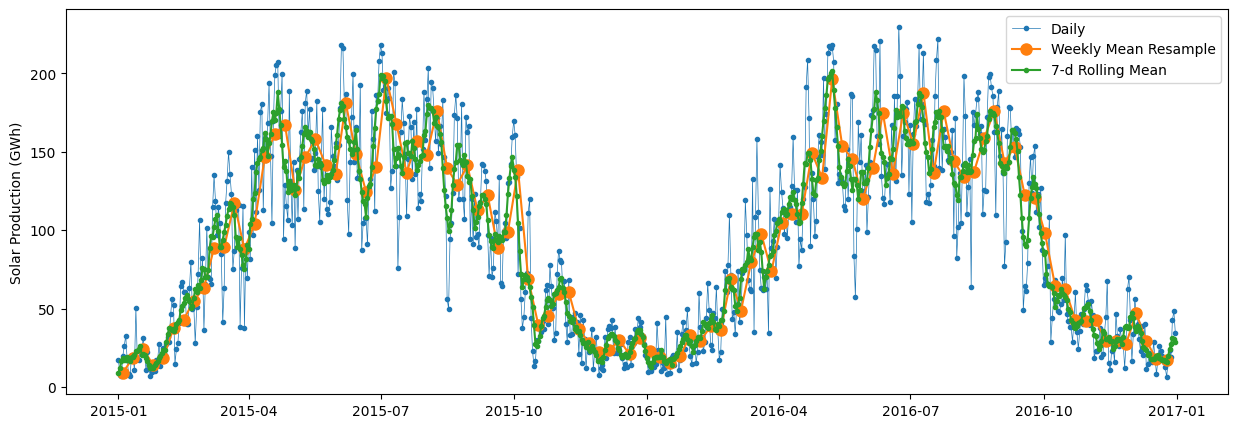

In [594]:
# график прозводства солнечной энергии за два года с начала 2015 и до конца 2016

start, end = '2015-01', '2016-12'

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(energy_data.loc[start:end, 'Solar'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(energy_data_mean.loc[start:end, 'Solar'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(energy_data_7d.loc[start:end, 'Solar'],
        marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Solar Production (GWh)')


ax.legend()

**Ответ:**

Построен график прозводства солнечной энергии по дням с начала 2015 года по конец 2016.
По графику можно сказать, что производство солнейчной энергии нарастает с приближением летних месяцев и убывает с приближением зимних месяцев, что обусловлено большим количеством солнечных дней в летний период, нежели в зимний.
Так же можно отметить, что солнечных дней в 2015 году солнечных дней было больше во второй половине летних месяцев, а в 2016 в начале. В сентябре-октябре боих годов на графике резкий спад, поэтому можно сказать, что в эти года наблюдалось резкое похолодание.

---

2. Мы видим, что на графике потребления энергии есть пики, приходящие на зиму. Постройте детальный график потребления энергии за зиму некоторого года. Есть ли на графике неожиданные пики или падения? сравните с другими годами. С чем это может быть связано?

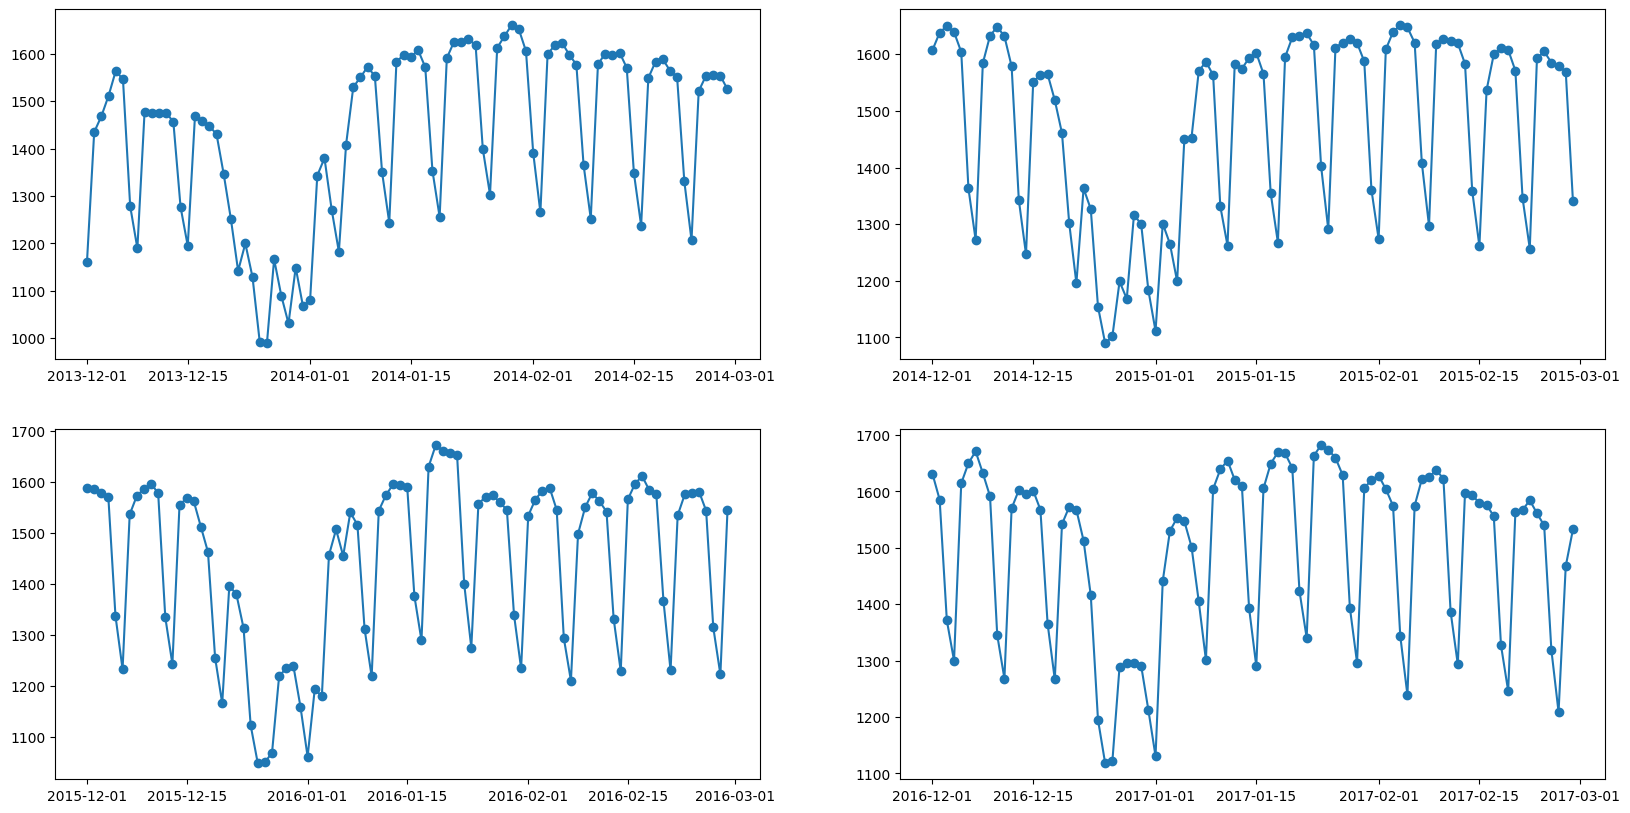

In [596]:
# график потребления энергии в зимние месяцы с 2013 по 2016

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0][0].plot(energy_data.loc['2013-12':'2014-02', 'Consumption'], marker='o', linestyle='-')
ax[0][1].plot(energy_data.loc['2014-12':'2015-02', 'Consumption'], marker='o', linestyle='-')

ax[1][0].plot(energy_data.loc['2015-12':'2016-02', 'Consumption'], marker='o', linestyle='-')
ax[1][1].plot(energy_data.loc['2016-12':'2017-02', 'Consumption'], marker='o', linestyle='-')

**Ответ:**

Построены 4 графика потрбеления энергии за три месяца зимы с 2013 по 2016 год. На всех есть неожиданные падения перед новым годом. Вероятно это связано с рождественскими и новогодними праздниками, когда производства, предприятия и другие учжреждения работающие по графику, останавливаются на выходные дни.

---

3. Постройте графики производства энергии ветра за разные периоды (год, полгода, два года). Наблюдается ли сезонность у этой величины?

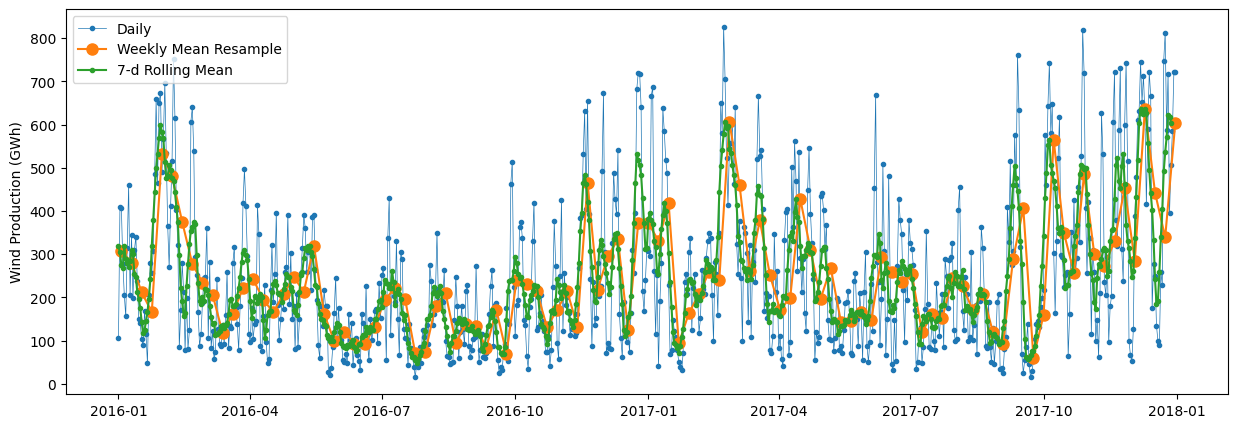

In [580]:
# график производства энергии ветра с начала 2016 и до конца 2017

start, end = '2016-01', '2017-12'

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(energy_data.loc[start:end, 'Wind'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(energy_data_mean.loc[start:end, 'Wind'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(energy_data_7d.loc[start:end, 'Wind'],
        marker='.', linestyle='-', label='7-d Rolling Mean')

ax.set_ylabel('Wind Production (GWh)')
ax.legend()

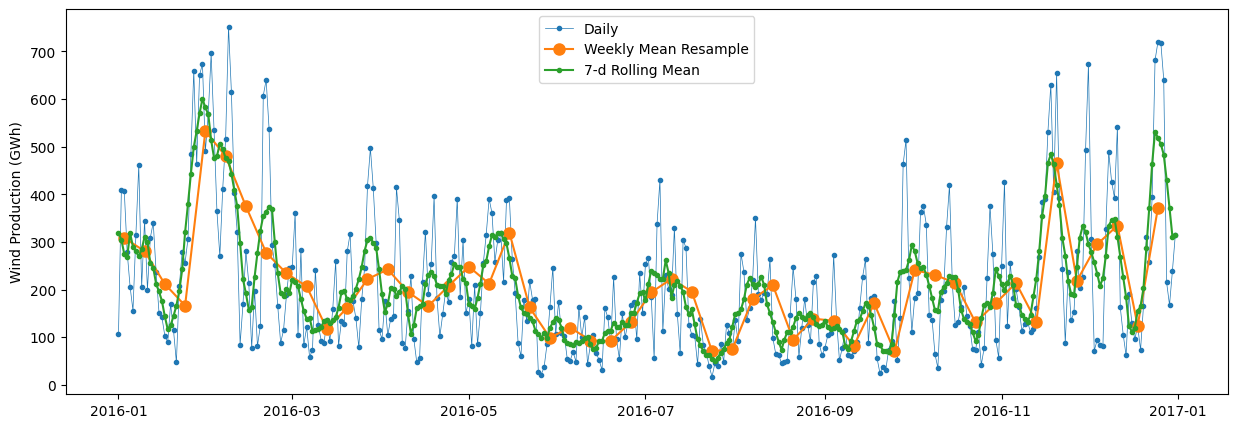

In [585]:
# график производства энергии ветра с начала 2016 и до конца 2016

start, end = '2016-01', '2016-12'

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(energy_data.loc[start:end, 'Wind'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(energy_data_mean.loc[start:end, 'Wind'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(energy_data_7d.loc[start:end, 'Wind'],
        marker='.', linestyle='-', label='7-d Rolling Mean')

ax.set_ylabel('Wind Production (GWh)')
ax.legend()

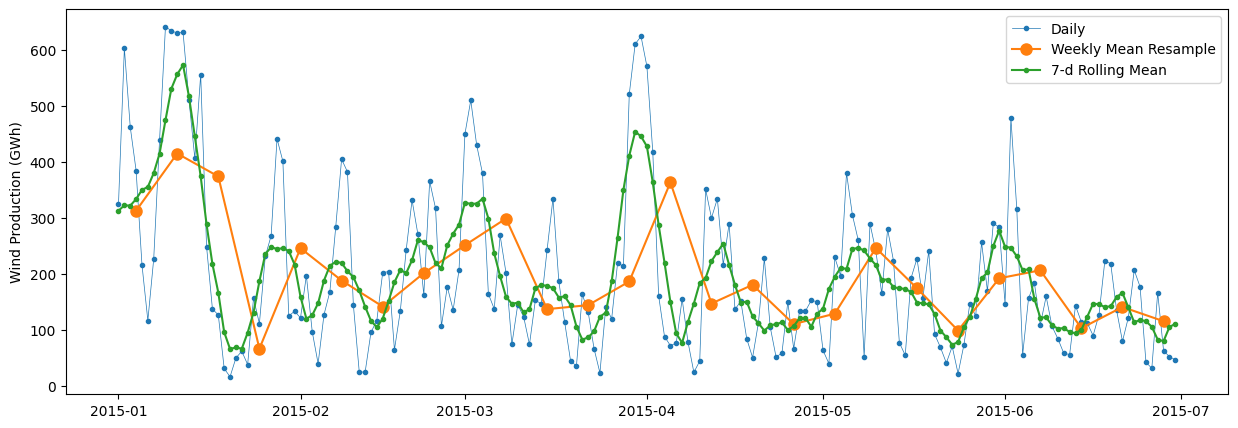

In [584]:
# график производства энергии ветра за первые полгода 2015 года

start, end = '2015-01','2015-06'

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(energy_data.loc[start:end, 'Wind'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(energy_data_mean.loc[start:end, 'Wind'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(energy_data_7d.loc[start:end, 'Wind'],
        marker='.', linestyle='-', label='7-d Rolling Mean')

ax.set_ylabel('Wind Production (GWh)')
ax.legend()

**Ответ:**

По графикам производства энергии ветра за два года (с начала 2016 и до конца 2017), год (с начала 2016 и до конца 2016) и полгода (с января 2015 и до конца июня 2015) можно заменить, что производство энергии ветра имеет сезонность: в летние месяцы может упасть как минимум в два раза. Но по графикам можно отметить, что производство энергии ветра в меньшей степени зависит от сезона, как, например, это можно заметить по графткам производства солнечной энергии.

---

4. Есть ли тренд в данных произоводства солнечной энергии и энергии ветра? 

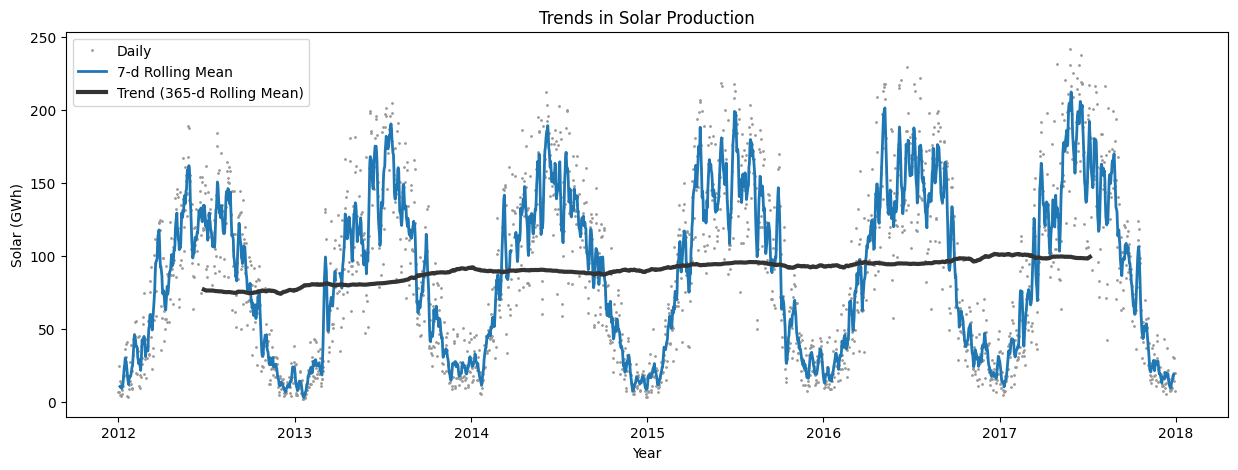

In [600]:
# тренд в данных произоводства солнечной энергии

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(energy_data['Solar'], marker='.', markersize=2, color='0.6',
        linestyle='None', label='Daily')
ax.plot(energy_data_7d['Solar'], linewidth=2, label='7-d Rolling Mean')
ax.plot(energy_data_365d['Solar'], color='0.2', linewidth=3,
        label='Trend (365-d Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Solar (GWh)')
ax.set_title('Trends in Solar Production');

Text(0.5, 1.0, 'Trends in Wind Production')

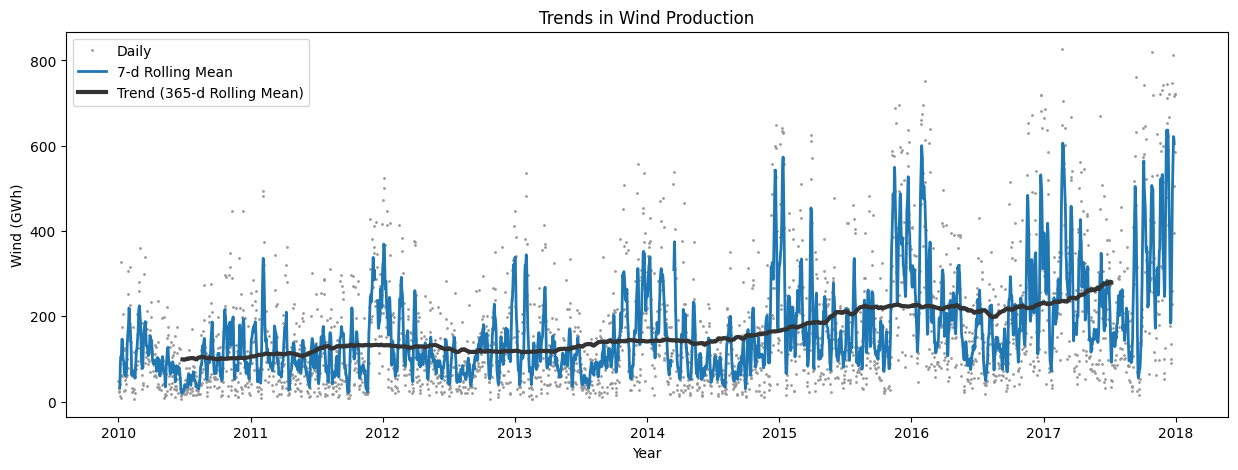

In [601]:
# тренд в данных произоводства энергии ветра

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(energy_data['Wind'], marker='.', markersize=2, color='0.6',
        linestyle='None', label='Daily')
ax.plot(energy_data_7d['Wind'], linewidth=2, label='7-d Rolling Mean')
ax.plot(energy_data_365d['Wind'], color='0.2', linewidth=3,
        label='Trend (365-d Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Wind (GWh)')
ax.set_title('Trends in Wind Production')

**Ответ:**

Тренд в данных произоводства солнечной энергии и энергии ветра есть и он направлен на увеличение производства. В производствк энергии ветра этот тренд более заметен. За 8 лет (с 2010 и до 2018) объем производства энергии ветра увеличился в 3 раза. Вероятно потому что производство энергии ветра меньше зависит от сезонности, чем производство солнечной энерегии. За 6 лет (с 2012 и до 2018) объем производства солнечной энергии вырос небольше, чем в 1,5 раза.